## Pair Programming - Regresión lineal 4

### Covarianza y correlación

---

In [8]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import random 

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Medida gráficos
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [9]:
plt.rcParams["figure.figsize"] = (10,10)
sns.set_palette("PiYG_r")

In [10]:
df = pd.read_csv("../archivos/metro_1.csv", index_col=0)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.


### 1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


La covarianza indica si la dirección de las variables varían en la misma dirección, que puede ser positiva o negativa.

La correlación mide la fuerza con la las variabales a comparar están relacionadas. Los resultados máximos van de 1 a -1.  

### 2. Calculad la covarianza y la correlación de nuestro dataset. 
No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [11]:
df.cov()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,177.921931,5.419823,-0.002153,-53.065756,3.449724e+03
rain_1h,5.419823,2006.774138,-0.000033,8.421489,4.196862e+02
snow_1h,-0.002153,-0.000033,0.000067,0.008903,1.195085e-02
clouds_all,-53.065756,8.421489,0.008903,1522.186826,5.204654e+03
traffic_volume,3449.724357,419.686216,0.011951,5204.653959,3.947988e+06


In [12]:
df.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009070,-0.019756,-0.101968,0.130161
rain_1h,0.009070,1.000000,-0.000090,0.004818,0.004715
snow_1h,-0.019756,-0.000090,1.000000,0.027934,0.000736
clouds_all,-0.101968,0.004818,0.027934,1.000000,0.067138
traffic_volume,0.130161,0.004715,0.000736,0.067138,1.000000


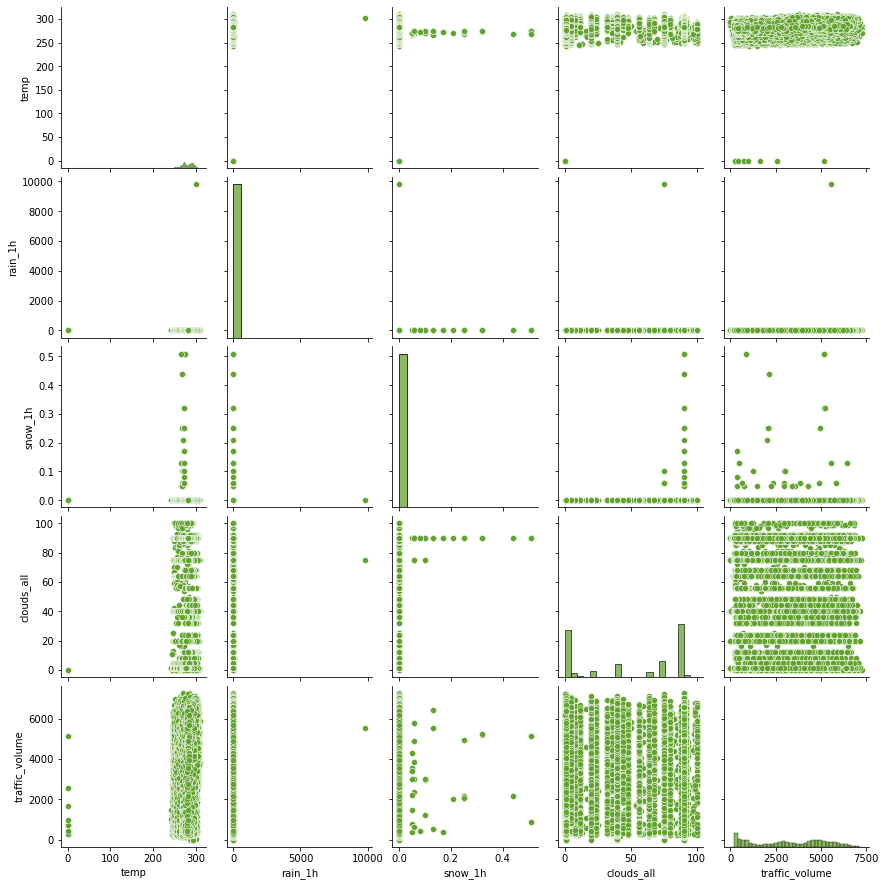

In [13]:
sns.pairplot(df);

Según los resultados vemos que en la covarianza de las variables predictoras es en parte positiva y en parte negativa, también observamos que al mirar la correlación la fuerza con la que están relacionadas no es muy alta. 

Con el pairplot vemos relación aunque interpretamos que no es lineal y nos lleva a destacar la relación entre la variable respuesta con las variables predictivas de "temp" y "clouds_all".

También vemos que en las variables predictivas con la respuesta hay un patrón de tráfico en el metro independientemente del tiempo que haga, quizás necesitaríamos más variables?

Como vemos que no hay una correlación lineal entre nuestras variables vamos a probar hacer la correlación de Spearman, para que nos de unos datos más precisos.

In [14]:
df.corr(method="spearman")

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.140167,-0.033357,-0.156970,0.132738
rain_1h,0.140167,1.000000,-0.001056,0.147388,0.004763
snow_1h,-0.033357,-0.001056,1.000000,0.037004,-0.005187
clouds_all,-0.156970,0.147388,0.037004,1.000000,0.056832
traffic_volume,0.132738,0.004763,-0.005187,0.056832,1.000000


### 3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


In [15]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

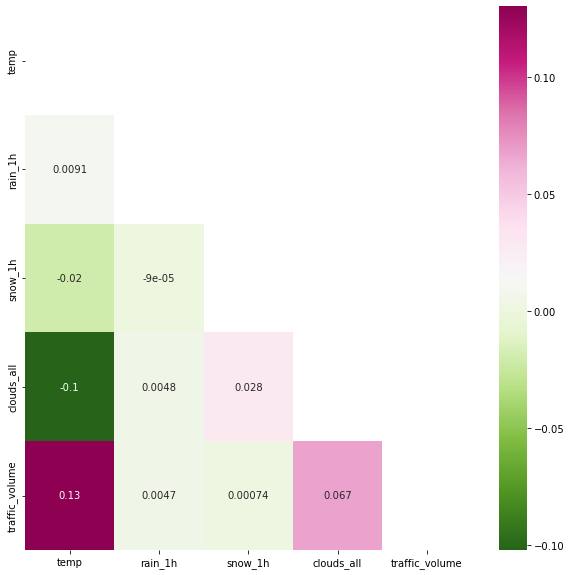

In [18]:
fig= sns.heatmap(df.corr(), cmap="PiYG_r", mask= mask, annot=True)
plt.savefig("../graficas/heatmap_df_metro.png");

### 4. Guardad la gráfica del heatmap.

La hemos guardado arriba, al crear el heatmap.